In [6]:
from metakernel import register_ipython_magics
register_ipython_magics()

Tematika

4. For ciklus, összetett adatstruktúrák
	1. dictionary (kell a kwargshoz) 
		1. in operator
	2. set
	3. for
		1. iterálás adatstruktúrákon: string, list, ...
		2. keresés, alap algoritmusok
		3. iterálás indexekkel: range
		4. zip, enumerate
	4. list comprehension 
		1. if-fel együtt
		2. említésképp nested list comprehension
	5. debug
		1. watch window
		2. for ciklusba belépés, ciklikusság bemutatása léptetéseel
	6. algelméletes példák
		1. maximum keresés
		2. sorbarendezés (valamelyik négyzetes komplexitású algóval, pl. bubble sort)
		3. (ennek a repetitivitásával lehet átvezetni a függvényekre)

## Dictionary

- kulcs-érték párok
- ellentétben a listával, itt a értékeket nem a pozíciójuk (indexük) alapján érjük el, hanem a kulcsuk alapján
- maga a dictionary megváltoztatható (mutábilis), de a kulcsoknak immutáblilsnek, és egyedinek kell lenniük

In [2]:
%%tutor
student = {"név": "Béla", "kor": 22, "véralkoholszint": 0.002}
name = student["név"]

In [3]:
%%tutor
studentA = {"név": "Béla", "kor": 22, "véralkoholszint": 0.002}
studentB = {"név": "László", "kor": 21, "véralkoholszint": 0}

students = {"iszik": studentA, "nem iszik": studentB}
print(students)

In [4]:
# student["lakhely"]: KeyError-t dob
student = {"név": "Béla", "kor": 22, "véralkoholszint": 0.002}

import traceback
try:
    student["lakhely"]
except KeyError:
    traceback.print_exc()


Traceback (most recent call last):
  File "/var/folders/qc/rczznb9n5b5fkzyn7sbx04cr0000gn/T/ipykernel_36611/2224098357.py", line 6, in <module>
    student["lakhely"]
KeyError: 'lakhely'


`dictionary.get(key,default=None)`

In [5]:
# a .get függvény: ha nem vagyunk biztosak abban, hogy a kulcs megtalálható-e
print(student.get("lakhely"))
print(student.get("lakhely","Budapest"))

None
Budapest


In [6]:
if "lakhely" in student.keys():
    print(student["lakhely"])
else:
    print(None)

None


In [7]:
# Kulcs csak nem megváltoztatható (immutalbe) objektum lehet
key_list = [1]
try:
    my_dict = {key_list: "egy"}
except TypeError as e:
    print(e)

unhashable type: 'list'


In [8]:
# Fordítva természetesen megy (mivel a string immutable)
my_dict = {"egy": key_list}
my_dict

{'egy': [1]}

## Set

In [9]:
my_set1 = {1,2,3,4,"alma",1j}
my_set2 = {1,2,5,6,"körte"}
my_set1.add(5)

In [10]:
my_set1.add(5)
my_set1
# figyeljük meg, hogy a kiíratási sorrend más, mint az inicializáskor

{1, 1j, 2, 3, 4, 5, 'alma'}

In [11]:
try: 
    my_set1[1]
except Exception as e:
    print(e)

'set' object is not subscriptable


`set`-ben nincs sorrendiség definiálva, az elemek helyét az értékük határozza meg. Mi van, ha 2 elem értéke ugyanaz?

In [12]:
my_set1.add(1)
my_set1

{1, 1j, 2, 3, 4, 5, 'alma'}

Nem történik "semmi", nem lehet két elem értéke ugyanaz. 

Mi van akkor, ha megváltoztatható (mutábilis) adattípust teszünk a `set`-be? Nem lehet: `TypeError`. Szorgalmi: mi lenne a probléma azzal, ha ezt a műveletet engedné az interpreter? Mi az a `hash`, és a `hash table`.

In [13]:
my_list = [1,2,3]
try:
    my_set_list = {my_list}
except TypeError as e:
    print(e)

unhashable type: 'list'


Egy-két alap halmazművelet

In [14]:
%%tutor
my_set1 = {1,2,3,4,"alma",1j+2}
my_set2 = {1,2,5,6,"körte"}
my_set_union = my_set1.union(my_set2)
my_set_inter = my_set1.intersection(my_set2)

Trükk: távolítsunk el duplikátumokat egy listából

In [15]:
list_with_dupl = [1,4,4,5,3,3,2,1,3,6]
list_undupl_set = list(set(list_with_dupl))
print(list_undupl_set)

[1, 2, 3, 4, 5, 6]


A `set`-ek másik nagy előnye: a keresés időigénye független a `set` elemeinek számától, $\mathcal{O}(1)$ az időkomplexitása, ami a listákban ez az elemszámtól függ: $\mathcal{O}(N)$, mivel végig kell iterálni az elemeken.

In [16]:
upper_limit = 1000000
my_list = list(range(upper_limit))

my_element = upper_limit-1
element_is_in = False

for e in my_list:
    if e == my_element:
        element_is_in = True

element_is_in

True

In [17]:
element_is_in = my_element in my_list
element_is_in

True

In [18]:
%timeit my_element in my_list

6.47 ms ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
my_set = set(my_list) # konvertáljuk át
my_element in my_set

True

In [20]:
%timeit my_element in my_set

31.5 ns ± 0.526 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## For ciklus

In [3]:
# A range objektum: végig lehet rajta iterálni
start = 0
stop = 9 # ez már nem kerül bele!
step = 1
my_range = range(start,stop,step)
my_range

range(0, 9)

In [4]:
list(my_range)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
for i in range(9):
    print(i, end=' ') # end=' ': ne új sorba kerüljenek a kiíratások

0 1 2 3 4 5 6 7 8 

In [125]:
for char in "abcdefg":
    print(char)

a
b
c
d
e
f
g


In [128]:
# Ha szükségünk lenne az indexre is:
for idx,char in enumerate("abcdefg"):
    print(idx,char)

print("A ciklus végén a ciklusváltozók megmaradnak:")
print(idx,char)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
A ciklus végén a ciklusváltozók megmaradnak:
6 g


In [140]:
%%tutor
# Mi van akkor, ha egyszerre több objektumon szeretnénk végigiterálni? 
capitals = ("A", "B", "C", "D")
lowers = ("a", "b", "c", "d")

for cap,low in zip(capitals,lowers): 
    print(cap,low)

Adott két lista `list1` és `list1`. Távolítsuk el azokat az elemeket `list1`-ből, amik `list2`-ben benne vannak. 

In [22]:
list1 = ["A","B","C","D"]
list2 = ["A","B","E","F"]

for element in list1:
    if element in list2:
        list1.remove(element)

print("Eredmény, amire számítunk: ['', '']")
print(f"Eredmény, amit kapunk: {list1}")

Eredmény, amire számítunk: ['', '']
Eredmény, amit kapunk: ['B', 'C', 'D']


Mi történhetett? Vizsáljuk meg közelebbről:

In [23]:
%%tutor

list1 = ["A","B","C","D"]
list2 = ["A","B","E","F"]

for index,element in enumerate(list1):
    print(index)
    if element in list2:
        list1.remove(element)

Iteráció közben módosítottuk a listát, amin iteráltunk! A `for` ciklus az indexeken iterál végig. Az első iterációban a `0` indexnél jártunk, amihez az `A` elem tartozott. Amikor ezt töröltünk, a `0` indexhez a `B` elem kerül, a következő iterációban viszont már az `1` indexű elemet vettük, ami a `C`. Így a `B` kimaradt az iterációból.

## Algoritmusok for ciklussal

### Maximum keresés

In [173]:
%%tutor
my_list = [1,4,7,10,2,5,0,-1,5]

current_max = my_list[0]
max_idx = 0
for idx,num in enumerate(my_list):
    if num > current_max:
        current_max = num
        max_idx = idx

print(current_max)
print(max_idx)

In [179]:
# vagy
my_list = [1,4,7,10,2,5,0,-1,5]
max_num = max(my_list)
print(f"Legnagyobb szám: {max_num}")

# mi ennek az indexe? Beépített fv. nincs rá :(
max_idx = 0
for idx,num in enumerate(my_list):
    if num == max_num:
        max_idx = idx
        break
print(f"Legnagyobb szám indexe: {max_idx}")

Legnagyobb szám: 10
Legnagyobb szám indexe: 3


### Sorbarendezés

In [234]:
my_list = [3,4,1,5,6,2]
print(f"Step 0: {my_list}")  # Shows the array after each step
n = len(my_list)
for i in range(n): # fontos, hogy nem közvetlenül a listán iterálunk!
    # Find the minimum element in remaining unsorted array
    min_idx = i
    for j in range(i + 1, n):
        if my_list[j] < my_list[min_idx]:
            min_idx = j
    # Swap the found minimum element with the first element
    my_list[i], my_list[min_idx] = my_list[min_idx], my_list[i]
    print(f"Step {i + 1}: {my_list}")  # Shows the array after each step


Step 0: [3, 4, 1, 5, 6, 2]
Step 1: [1, 4, 3, 5, 6, 2]
Step 2: [1, 2, 3, 5, 6, 4]
Step 3: [1, 2, 3, 5, 6, 4]
Step 4: [1, 2, 3, 4, 6, 5]
Step 5: [1, 2, 3, 4, 5, 6]
Step 6: [1, 2, 3, 4, 5, 6]


In [107]:
%%html 

<iframe
  src="./selection-sort.html"
  width="100%"
  height="180px"
>
</iframe>

In [22]:
# Bubble sort
my_list = [3,4,1,5,6,2]
print(my_list)
for i in range(len(my_list)-1,0,-1):
    for j in range(i):
        if my_list[j] > my_list[j+1]:
            my_list[j],my_list[j+1] =  my_list[j+1],my_list[j]
            print(my_list)

[3, 4, 1, 5, 6, 2]
[3, 1, 4, 5, 6, 2]
[3, 1, 4, 5, 2, 6]
[1, 3, 4, 5, 2, 6]
[1, 3, 4, 2, 5, 6]
[1, 3, 2, 4, 5, 6]
[1, 2, 3, 4, 5, 6]


In [34]:
# Bogo-sort :)
import random

my_list = [3,4,1,5,6,2] # ne növeljük nagyon, ha csak nem érünk rá

trials = 0
while not sorted(my_list) == my_list:
    random.shuffle(my_list)
    trials+=1

print(f"Próbálkozások száma: {trials}, eredmény: {my_list}")

Próbálkozások száma: 129, eredmény: [1, 2, 3, 4, 5, 6]


In [56]:
# Bináris keresés rendezett listában
import random 

num_elem = 20
my_list = []
for _ in range(num_elem):
    my_list.append(random.randint(0,50))

my_list = sorted(my_list)
print(my_list)

target = 35

left = 0
right = len(my_list) - 1

for _ in range(len(my_list)):
    mid = (left + right) // 2

    if my_list[mid] == target:
        target_idx = mid
        break
    elif my_list[mid] > target:
        right = mid - 1
    else:
        left = mid + 1

    if left > right:
        target_idx = -1
        break

print(f"The index of element {target} in my_list is: {target_idx}")

[11, 13, 14, 15, 16, 17, 19, 20, 21, 21, 23, 26, 29, 32, 32, 35, 36, 44, 47, 49]
The index of element 35 in my_list is: 15


In [68]:
# Prímcheck
import math

n = 1802734890723
is_prime = True # kezdeti tipp

if n<=1:
    is_prime = False
else:
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            is_prime = False
            break
            
print(f"{n} prím? {'Igen' if is_prime else 'Nem' }")

1802734890723 prím? Nem


## List comprehension

In [77]:
# Lista elemeinek négyzete
l_nums = [2,4,6,8,11]
l_squares_for = []

for el in l_nums:
    l_squares_for.append(el**2)

# vagy

l_squares_listcomp = [el**2 for el in l_nums]

In [91]:
# Lista elemeinek négyzetgyöke
import math

l_nums = [2,-10,6,8,11,-3, 0]

# Figyeljünk arra, hogy kezelni kell a negatív számokat!

l_sqrt = [math.sqrt(el) for el in l_nums if el >= 0]
print(l_sqrt)

# Ha szeretnénk else ágat is jelölni a negatív számokat
l_sqrt = [math.sqrt(el) if el>=0 else "NaN" for el in l_nums]
print(l_sqrt)

[1.4142135623730951, 2.449489742783178, 2.8284271247461903, 3.3166247903554, 0.0]
[1.4142135623730951, 'NaN', 2.449489742783178, 2.8284271247461903, 3.3166247903554, 'NaN', 0.0]


In [98]:
# Euklideszi távolság az origótól 2D-ben
points_xy = [(1,4), (4,2), (8,8), (3,1)]
distances = [x**2 + y**2 for x,y in points_xy]
print(distances)

# Mi van akkor, ha külön listában vannak? Használjunk `zip`-et
points_x = [1,4,8,3]
points_y = [4,2,8,1]

distances = [x**2 + y**2 for x,y in zip(points_x,points_y)]

[17, 20, 128, 10]
[17, 20, 128, 10]


[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5)]


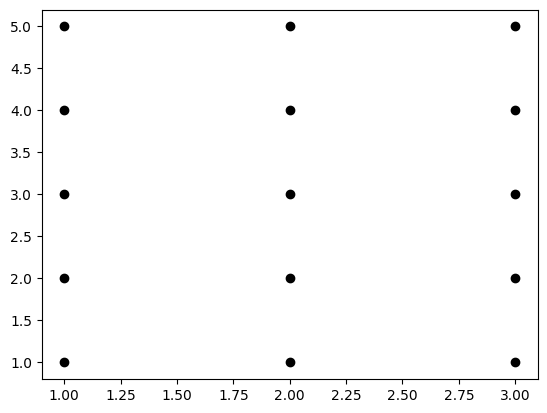

In [108]:
# Készítsünk négyzetrácsot x és y koordinátákból. Kell az összes xy kombináció.
points_x = [1,2,3]
points_y = [1,2,3,4,5]
points = [(x,y) for x in points_x for y in points_y]
print(points)

import matplotlib.pyplot as plt
for x,y in points:
    plt.scatter(x,y,c="k")

In [120]:
%%timeit
# Egy kis futási idő tesztelés
l_for = []
MILLION = 1000000

for i in range(MILLION):
    l_for.append(i**2)

224 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [127]:
%%timeit
MILLION = 1000000

l_comp = [i**2 for i in range(MILLION)]

206 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [132]:
%%timeit
MILLION = 1000000

tuple_comp = (i**2 for i in range(MILLION))

212 ns ± 2.01 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Tanulság: list comprehension-ök alapvetően gyorsabbak, mint a for ciklusok. A tuple immutable, ami hatalmas előny sebesség szempontjából.

In [69]:
import random
from utils import create_meme

original_string = "don't use that weird spongebob mocking meme"
mock_string = ""
for char in original_string:
    random_number = random.random()
    if random_number < 0.5: # 50% esély
        mock_string += char.capitalize()
    else:
        mock_string += char
print(mock_string)    
create_meme(mock_string)

doN't USE thaT WEird SPonGeboB MockIng meMe


In [7]:
%%tutor

# list comprehension
l = [e**e for e in range(10) if e%2==0]
# set comprehension
s = {e**e for e in range(10) if e%2==0}
# dict comprehension
d = {e: e**e for e in range(10) if e%2==0}


Test